In [1]:
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import *
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.utils import np_utils
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, Input

%matplotlib inline

Using TensorFlow backend.


In [2]:
dataset_path = 'mfccs/40/'
cls_list = ['blues',
            'classical',
            'country',
            'disco',
            'hiphop',
            'jazz',
            'metal',
            'pop',
            'reggae',
            'rock']

### Data loading and preparation

In [3]:
X = []
y = []

for cls in tqdm(os.listdir(dataset_path)):
    cls_path = os.path.join(dataset_path, cls)
    
    for f in os.listdir(cls_path):
        X.append(pd.read_csv(os.path.join(cls_path, f), delimiter=';', header=None).iloc[:, :-1])
        y.append(cls_list.index(cls))

100%|██████████| 10/10 [00:17<00:00,  1.81s/it]


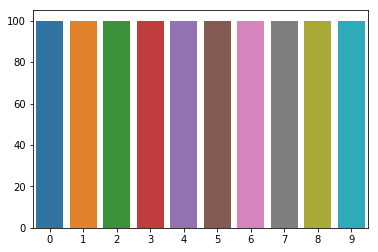

In [4]:
y_np = np.asarray(y)
v, c = np.unique(y_np, return_counts=True)
sns.barplot(v, c)

#### MFCC simplification
Each audio has 13 MFCCs per frame. We are simplifying it by computing the mean of the frames and using the resulting single vector of 13 MFCCs as the audio representation.

In [5]:
X_std = []

for idx, i in tqdm(enumerate(X)):
    X_std.append(np.mean(i, axis=0))

1000it [00:00, 1857.83it/s]


In [6]:
X_std = np.asarray(X_std)
print(X_std.shape, X_std.dtype)

(1000, 40) float64


### Train/Val split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_std, y_np, test_size=0.33, random_state=33, stratify=y_np)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(670, 40) (330, 40) (670,) (330,)


In [8]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
print(y_train.shape, y_val.shape)

(670, 10) (330, 10)


In [9]:
def create_model():
    inp = Input(shape=(X_train.shape[1],))
    x = Dense(64)(inp)
    x = Activation('relu')(x)

    x = Dense(10)(x)
    x = Activation('softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [10]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2624      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 3,274.0
Trainable params: 3,274.0
Non-trainable params: 0.0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100, 
                    validation_data=(X_val, y_val))

Train on 670 samples, validate on 330 samples
Epoch 1/100
670/670 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/100
670/670 [==============================] - 0s - loss: 14.506

670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 66/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 67/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 68/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 69/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 70/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 71/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 72/100
670/670 [==============================] - 0s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.10

In [12]:
y_train_pred = model.predict(X_train)
y_train_pred_max = np.argmax(y_train_pred, axis=1)
y_train_max = np.argmax(y_train, axis=1)

print('Train')
print(classification_report(y_train_max, y_train_pred_max))

Train
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00        67
           7       0.00      0.00      0.00        67
           8       0.10      1.00      0.18        67
           9       0.00      0.00      0.00        67

   micro avg       0.10      0.10      0.10       670
   macro avg       0.01      0.10      0.02       670
weighted avg       0.01      0.10      0.02       670



/home/thomas/.envs/py3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


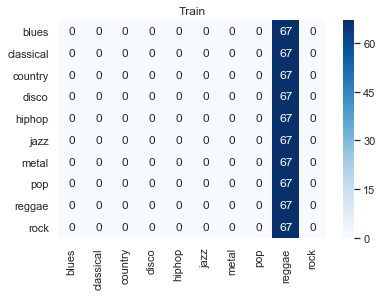

In [13]:
cm = confusion_matrix(y_train_max, y_train_pred_max)
sns.set()
plt.figure()
plt.title('Train')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')

In [14]:
y_pred = model.predict(X_val)
y_pred_max = np.argmax(y_pred, axis=1)
y_max = np.argmax(y_val, axis=1)

print('Val')
print(classification_report(y_max, y_pred_max))

Val
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00        33
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        33
           8       0.10      1.00      0.18        33
           9       0.00      0.00      0.00        33

   micro avg       0.10      0.10      0.10       330
   macro avg       0.01      0.10      0.02       330
weighted avg       0.01      0.10      0.02       330



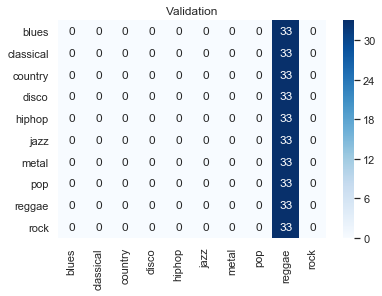

In [15]:
cm = confusion_matrix(y_max, y_pred_max)
sns.set()
plt.figure()
plt.title('Validation')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')

### With normalization

In [16]:
X_train_means = X_train.mean(axis=0)
X_train_stds = X_train.std(axis=0)

print('Means:', X_train_means)
print('Stds:', X_train_stds)

Means: [-6.53808734e+02  1.32766258e+02 -6.54445158e+00  3.43617182e+01
 -3.21652776e+00  1.20373480e+01 -7.91854426e+00  9.99209549e+00
 -8.24767138e+00  7.48773155e+00 -6.81376813e+00  4.14279644e+00
 -5.15811964e+00  2.85165615e+00 -4.67715837e+00  2.94904437e+00
 -3.72998449e+00  1.40751977e+00 -2.30915623e+00  1.23938803e+00
 -2.79040191e+00  7.06994866e-01 -1.70274159e+00  2.18609142e-01
 -1.72936133e+00  2.10461578e-01 -1.76033658e+00 -8.86715036e-02
 -1.31601389e+00 -9.48223939e-02 -1.31549367e+00 -3.40067214e-01
 -1.04831357e+00 -4.12278269e-02 -7.17741366e-01 -1.04958788e-01
 -4.72918123e-01 -1.72161568e-01 -1.89269007e-01  1.19526117e-01]
Stds: [100.98844456  35.96154347  24.49787439  20.23931133  12.09306296
  13.28726356  10.07597066  10.23729255   7.87971411   7.2540294
   6.96765583   5.6869502    5.68834812   4.74781843   4.96506174
   4.4625736    4.14259406   3.73595479   3.89018825   3.17528634
   3.31421975   2.85206804   2.9525473    2.64310153   2.41000717
   2.21

In [17]:
X_train -= X_train_means
X_train /= X_train_stds

print('Means:', X_train.mean(axis=0))
print('Std:', X_train.std(axis=0))

Means: [ 1.96625469e-15 -1.42978498e-15  2.12102309e-17 -1.05852309e-15
  2.49883033e-16 -1.76020061e-16  5.99851843e-16  1.11436565e-16
  1.61313748e-16 -3.93911686e-17 -6.42935125e-16 -4.23210389e-16
 -7.49359115e-16 -7.22473491e-17  1.10558329e-15 -3.92472124e-16
 -1.33945508e-15  1.29912664e-16  3.63556614e-16  1.12513647e-16
  4.09622585e-16 -1.84595291e-16 -1.43997583e-16  1.44577551e-16
  3.58585466e-16  3.03240020e-17 -2.69912616e-16 -2.10445260e-17
 -2.28507097e-16 -1.88903619e-17 -2.84515363e-16 -1.55845486e-16
 -4.72259048e-16  2.17901982e-17 -1.09779515e-16 -9.74344983e-17
 -2.24789093e-17  2.45243295e-17  5.12028231e-17 -1.18313319e-16]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
X_val -= X_train_means
X_val /= X_train_stds

In [19]:
model = create_model()

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100, 
                    validation_data=(X_val, y_val))

Train on 670 samples, validate on 330 samples
Epoch 1/100
670/670 [==============================] - 0s - loss: 2.5529 - acc: 0.1015 - val_loss: 2.3678 - val_acc: 0.1152
Epoch 2/100
670/670 [==============================] - 0s - loss: 2.1848 - acc: 0.2149 - val_loss: 2.1214 - val_acc: 0.2273
Epoch 3/100
670/670 [==============================] - 0s - loss: 1.9533 - acc: 0.3448 - val_loss: 1.9475 - val_acc: 0.3212
Epoch 4/100
670/670 [==============================] - 0s - loss: 1.7764 - acc: 0.4060 - val_loss: 1.8223 - val_acc: 0.3576
Epoch 5/100
670/670 [==============================] - 0s - loss: 1.6403 - acc: 0.4373 - val_loss: 1.7279 - val_acc: 0.3758
Epoch 6/100
670/670 [==============================] - 0s - loss: 1.5301 - acc: 0.4776 - val_loss: 1.6486 - val_acc: 0.4030
Epoch 7/100
670/670 [==============================] - 0s - loss: 1.4368 - acc: 0.5209 - val_loss: 1.5911 - val_acc: 0.4273
Epoch 8/100
670/670 [==============================] - 0s - loss: 1.3568 - acc: 0.5537

670/670 [==============================] - 0s - loss: 0.2553 - acc: 0.9612 - val_loss: 1.4992 - val_acc: 0.5515
Epoch 67/100
670/670 [==============================] - 0s - loss: 0.2481 - acc: 0.9642 - val_loss: 1.5070 - val_acc: 0.5515
Epoch 68/100
670/670 [==============================] - 0s - loss: 0.2423 - acc: 0.9642 - val_loss: 1.5198 - val_acc: 0.5545
Epoch 69/100
670/670 [==============================] - 0s - loss: 0.2353 - acc: 0.9687 - val_loss: 1.5238 - val_acc: 0.5545
Epoch 70/100
670/670 [==============================] - 0s - loss: 0.2295 - acc: 0.9687 - val_loss: 1.5327 - val_acc: 0.5545
Epoch 71/100
670/670 [==============================] - 0s - loss: 0.2234 - acc: 0.9731 - val_loss: 1.5420 - val_acc: 0.5545
Epoch 72/100
670/670 [==============================] - 0s - loss: 0.2182 - acc: 0.9731 - val_loss: 1.5507 - val_acc: 0.5545
Epoch 73/100
670/670 [==============================] - 0s - loss: 0.2131 - acc: 0.9731 - val_loss: 1.5608 - val_acc: 0.5485
Epoch 74/100


In [20]:
y_train_pred = model.predict(X_train)
y_train_pred_max = np.argmax(y_train_pred, axis=1)
y_train_max = np.argmax(y_train, axis=1)

print('Train')
print(classification_report(y_train_max, y_train_pred_max))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        67
           3       1.00      0.99      0.99        67
           4       1.00      0.99      0.99        67
           5       0.99      1.00      0.99        67
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        67
           8       0.99      1.00      0.99        67
           9       1.00      1.00      1.00        67

   micro avg       1.00      1.00      1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670



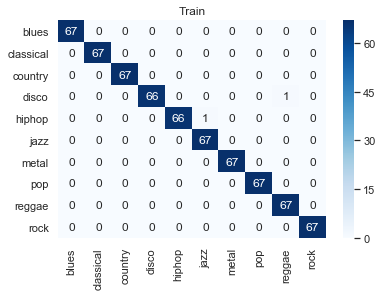

In [21]:
cm = confusion_matrix(y_train_max, y_train_pred_max)
sns.set()
plt.figure()
plt.title('Train')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')

In [22]:
y_pred = model.predict(X_val)
y_pred_max = np.argmax(y_pred, axis=1)
y_max = np.argmax(y_val, axis=1)

print('Val')
print(classification_report(y_max, y_pred_max))

Val
              precision    recall  f1-score   support

           0       0.68      0.45      0.55        33
           1       0.82      0.85      0.84        33
           2       0.45      0.55      0.49        33
           3       0.42      0.39      0.41        33
           4       0.43      0.45      0.44        33
           5       0.57      0.61      0.59        33
           6       0.75      0.73      0.74        33
           7       0.74      0.61      0.67        33
           8       0.47      0.55      0.51        33
           9       0.39      0.42      0.41        33

   micro avg       0.56      0.56      0.56       330
   macro avg       0.57      0.56      0.56       330
weighted avg       0.57      0.56      0.56       330



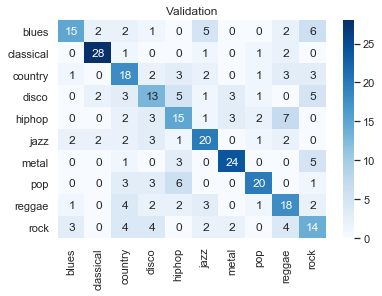

In [23]:
cm = confusion_matrix(y_max, y_pred_max)
sns.set()
plt.figure()
plt.title('Validation')
sns.heatmap(cm, annot=True, yticklabels=cls_list, xticklabels=cls_list, cmap='Blues')